## Introduction of data set

The data set contains only two columns :- Hours and Scores . By looking at data set we assume clearly ONE_ONE Relationship ,and we cleanly can apply LINEAR Regression 

# Importing all libraries required in this notebook

In [1]:
import os
import numpy as np
import pandas as pd

In [68]:
# Reading data from remote link
data=pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### EDA Analysis

In [7]:
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

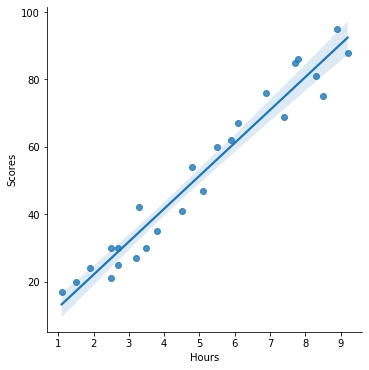

In [44]:
sns.pairplot(data,x_vars='Hours',y_vars='Scores',kind='reg',height=5)

# As we see There  is a linearity betweeen Hours vs scores

# Modelling

### **Preparing the data**

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:



In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm¶

## **Linear Regression with Python Scikit Learn**


In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

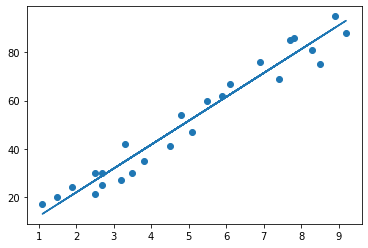

In [45]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [31]:
hours = 9.25
hours =np.array(9.25).reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [46]:
# TRIED WITH STATS MODEL

# using STATS MODEL  I Tried 

In [17]:
import statsmodels.formula.api as smf

In [18]:
reg=smf.ols("Scores~Hours",data=data)

In [19]:
results=reg.fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           9.13e-17
Time:                        10:08:55   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

In [47]:
predictions=results.predict(data)
print(type(predictions))

<class 'pandas.core.series.Series'>


In [22]:
actuals=data['Scores']

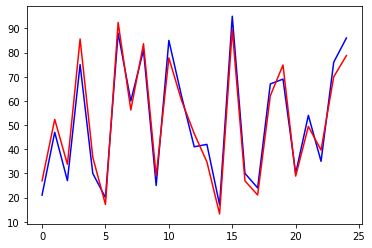

In [23]:
plt.plot(actuals,"b")
plt.plot(predictions,"r")

In [24]:
print('index\tpredictions\tactuals')
for i in range(len(actuals)):
    print(i,'\t',round(predictions[i],2),'\t\t',actuals[i])

index	predictions	actuals
0 	 26.92 		 21
1 	 52.34 		 47
2 	 33.77 		 27
3 	 85.58 		 75
4 	 36.7 		 30
5 	 17.15 		 20
6 	 92.42 		 88
7 	 56.25 		 60
8 	 83.62 		 81
9 	 28.88 		 25
10 	 77.76 		 85
11 	 60.16 		 62
12 	 46.47 		 41
13 	 34.74 		 42
14 	 13.24 		 17
15 	 89.49 		 95
16 	 26.92 		 30
17 	 21.06 		 24
18 	 62.12 		 67
19 	 74.82 		 69
20 	 28.88 		 30
21 	 49.41 		 54
22 	 39.63 		 35
23 	 69.94 		 76
24 	 78.73 		 86


In [25]:
import sklearn.metrics as metrics

In [26]:
## Mean Absolute error
mae = metrics.mean_absolute_error(actuals,predictions)
mae

4.972805319866379

In [27]:
np.mean(abs((actuals - predictions)/actuals)) #MAPE

0.11822090846452982

In [67]:
hours=pd.DataFrame(columns=['Hours'])
hours.loc[0]=9.25

own_pred =results.predict(hours)
print("Prediction Score",own_pred[0])

Prediction Score 92.90985477015728


In [1]:
# AS we A students who study more hours has good scores